In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import seaborn as sns

import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/RecycleMates'

/content/drive/MyDrive/Colab Notebooks/RecycleMates


# 1. Importing the dataset

In [ ]:
from pathlib import Path
p = Path().cwd()

In [ ]:
# create dictionary to mapping data classes/labels to integer labels
target_dict = {'can': 0,
               'cardboard': 1,
               'glass bottle': 2,
               'plastic bottle': 3}


# Importing the data
images1 = np.load(p/"images.npy")
labels1 = np.load(p/"labels.npy")
print(images1.shape)
print(labels1.shape)

(5520, 128, 128, 3)
(5520,)


## 1.1 Loading the original dataset

In [ ]:
# for fldr in q.iterdir():
#     current_label = fldr.name # get the name of the current label
#     temp = q/current_label # here we are adding each if the inside folder name to the path so we can go through each of them
#     for img in temp.iterdir():
#       img = load_img(img) # load image
#       img_array = img_to_array(img) # convert the image to an NumPy array
#       img_array_resized = smart_resize(img_array, size = (128,128)) # if necessary, resize the image to 128 by 128
#       images.append(img_array_resized) # add image to list of images
#       labels.append(fldr.name) # add label for this image to the list of labels

In [ ]:
# images1 = np.array(images) # convert the list of images to a NumPy array
# labels1 = np.array(labels) # convert the list of labels to a NumPy array
# print(images1.shape)
# print(labels1.shape)

In [ ]:
# # Saving the images so we don't have to loaded every time one by one
# np.save(p/"images", images1)
# np.save(p/"labels", labels1)

# 2. Exploring the data

In [ ]:
labels_int = [target_dict.get(e, e) for e in labels1] # use the target_dict to convert the string labels to an array of integers
labels_int = np.array(labels_int) # convert the list of int labels to a NumPy array

In [ ]:
# Getting number of pictures by class
unique, counts = np.unique(labels_int, return_counts=True)
dict(zip(unique, counts))

{0: 1414, 1: 1021, 2: 1448, 3: 1637}

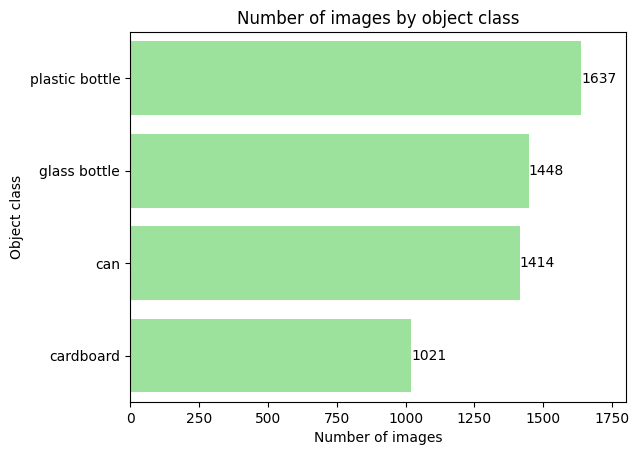

In [ ]:
# Create a DataFrame
objects = pd.DataFrame(labels1, columns=['Object'])

# Count the occurrences of each object
object_counts = objects['Object'].value_counts()

# Get the sorted order based on the counts
sorted_order = object_counts.index

# Plotting the countplot with ordered bars and horizontal orientation
sns.countplot(y='Object', data = objects, order = sorted_order, color = 'lightgreen')

# Adding count values at the top of each bar
for i, count in enumerate(object_counts):
    plt.annotate(str(count), (count, i), ha='left', va='center')

# Adding labels and title
plt.xlabel('Number of images')
plt.ylabel('Object class')
plt.title('Number of images by object class')

# Set the y-axis limit
plt.xlim(-0.5, 1800)

# Display the chart
plt.show()

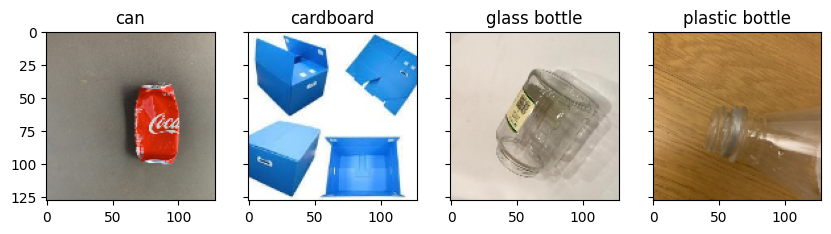

In [ ]:
import random

# Getting randon index numbers for each object class
can_i = random_number = random.randint(1, 1414)
cardboard_i = random_number = random.randint(1415, 1414+1021)
glassbottle_i = random_number = random.randint(1414+1021, 1414+1021+1448)
plasticbottle_i = random_number = random.randint(1414+1021+1448, 1414+1021+1448+1637)

# Plotting the images of the objects selected
f, axarr = plt.subplots(1, 4, sharey=True, figsize=(10, 10))
axarr[0].set_title(labels1[can_i])
axarr[0].imshow(images1[can_i]/255)
axarr[1].set_title(labels1[cardboard_i])
axarr[1].imshow(images1[cardboard_i]/255)
axarr[2].set_title(labels1[glassbottle_i])
axarr[2].imshow(images1[glassbottle_i]/255)
axarr[3].set_title(labels1[plasticbottle_i])
axarr[3].imshow(images1[plasticbottle_i]/255)